# CRÉDITOS HIPOTECARIOS

# Información:

Los modelos analíticos para el manejo de créditos hipotecarios se están usando por muchas instituciones y están dando resultados exitosos en todo el mundo. Éstos se pueden definir como un conjunto de métodos y técnicas cuantitativas usados para predecir la probabilidad de que un cliente adquiera el producto (Adquisición del crédito hipotecario) y en consecuencia éste cumpla sus sueños.

# Conjunto de datos de Crédito Hipotecario:

https://www.kaggle.com/c/machinelearningadvanced/data?select=AdquisicionHIP_Train.csv

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as ppr
import geopandas as gpd
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [79]:
%matplotlib inline

In [80]:
df = pd.read_csv('../Data/AdquisicionHIP_Train.csv')

In [81]:
df.head()

,ID,GENERO,ESTADO_CIVIL,EDAD,GRADO_INSTRUCCION,CONDICION_VIVIENDA,NUMERO_DEPENDIENTES,DPTO_DOMICILIO,ANTIGUEDAD_DOMICILIO,TIPO_TRABAJADOR,...,T_D_AC_VEN_MA30_3M,RT_N_ENT_M0_3M,ANTIGUEDAD_LABORAL,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL,MARGENOPERATIVO,CICLOFINANCIERO,SEGMENTO,TARGET
0,1,F,S,38,MEDIO/SECUNDARIA,PROPIO,2,LAMBAYEQUE,16,INDEPENDIENTE,...,0,0,16,1895.00,7960.0,0.22,26.91,59.67,2,0
1,2,F,S,39,MEDIO/SECUNDARIA,PROPIO,2,LIMA,4,INDEPENDIENTE,...,0,0,5,3957.37,1480.0,0.22,29.98,65.21,3,0
2,3,M,C,46,PRIMARIA,PROPIO,3,CAJAMARCA,26,INDEPENDIENTE,...,0,0,5,1338.00,2880.0,0.22,24.77,30.00,1,0
3,4,F,S,23,TECNICO,DE FAMILIAR,0,LA LIBERTAD,16,INDEPENDIENTE,...,0,0,5,3350.00,1800.0,0.22,72.82,25.80,3,0
4,5,F,C,34,MEDIO/SECUNDARIA,DE FAMILIAR,3,LIMA,16,INDEPENDIENTE,...,0,0,5,2003.60,82800.0,0.22,17.27,8.77,3,0


In [82]:
# Número de filas y columnas
df.shape

(8486, 24)

In [83]:
# Observando los tipos de variables
df.dtypes

ID                            int64
GENERO                       object
ESTADO_CIVIL                 object
EDAD                          int64
GRADO_INSTRUCCION            object
CONDICION_VIVIENDA           object
NUMERO_DEPENDIENTES           int64
DPTO_DOMICILIO               object
ANTIGUEDAD_DOMICILIO          int64
TIPO_TRABAJADOR              object
TIENE_VEHIVULO                 bool
LIQUIDEZDISPONIBLE          float64
ACTIVIDAD_ECONOMICA          object
DEUDAS_NEGATIVAS              int64
T_D_AC_VEN_MA30_3M            int64
RT_N_ENT_M0_3M                int64
ANTIGUEDAD_LABORAL            int64
UTILIDADOPERATIVA           float64
VENTASNETAS                 float64
ENDEUDAMIENTOPATRIMONIAL    float64
MARGENOPERATIVO             float64
CICLOFINANCIERO             float64
SEGMENTO                      int64
TARGET                        int64
dtype: object

In [84]:
# Separamos variables numericas y categoricas 
columnsNumeric   = ['EDAD','NUMERO_DEPENDIENTES','ANTIGUEDAD_DOMICILIO','LIQUIDEZDISPONIBLE',
                    'DEUDAS_NEGATIVAS','UTILIDADOPERATIVA',
                    'VENTASNETAS','ENDEUDAMIENTOPATRIMONIAL']
columnsCategoric = ['GENERO','ESTADO_CIVIL','GRADO_INSTRUCCION','CONDICION_VIVIENDA','DPTO_DOMICILIO',
                    'TIPO_TRABAJADOR','TIENE_VEHIVULO','ACTIVIDAD_ECONOMICA']

In [85]:
# No existen valores nulos
df.isnull().sum()

ID                          0
GENERO                      0
ESTADO_CIVIL                0
EDAD                        0
GRADO_INSTRUCCION           0
CONDICION_VIVIENDA          0
NUMERO_DEPENDIENTES         0
DPTO_DOMICILIO              0
ANTIGUEDAD_DOMICILIO        0
TIPO_TRABAJADOR             0
TIENE_VEHIVULO              0
LIQUIDEZDISPONIBLE          0
ACTIVIDAD_ECONOMICA         0
DEUDAS_NEGATIVAS            0
T_D_AC_VEN_MA30_3M          0
RT_N_ENT_M0_3M              0
ANTIGUEDAD_LABORAL          0
UTILIDADOPERATIVA           0
VENTASNETAS                 0
ENDEUDAMIENTOPATRIMONIAL    0
MARGENOPERATIVO             0
CICLOFINANCIERO             0
SEGMENTO                    0
TARGET                      0
dtype: int64

# Analizando la variable EDAD en rangos de edades:

In [86]:
import copy
edad = copy.copy(df['EDAD'])

In [87]:
edad_1 = list()
edad_2 = list()
edad_3 = list()
edad_4 = list()
edad_5 = list()
edad_6 = list()

for i in range(0,8486) :
    if edad[i] >= 18 and edad[i] <= 30: 
        edad_1.append(edad[i])
    elif edad[i] >= 31 and edad[i] <= 40:
        edad_2.append(edad[i])
    elif edad[i] >= 41 and edad[i] <= 50:
        edad_3.append(edad[i])
    elif edad[i] >= 51 and edad[i] <= 60:
        edad_4.append(edad[i])
    elif edad[i] >= 61 and edad[i] <= 70:
        edad_5.append(edad[i])
    elif edad[i] >= 71 and edad[i] <= 80:
        edad_6.append(edad[i])

print('Cantidad de personas entre 18 y 30 años: ', len(edad_1))  
print('Cantidad de personas entre 31 y 40 años: ', len(edad_2))
print('Cantidad de personas entre 41 y 50 años: ', len(edad_3))
print('Cantidad de personas entre 51 y 60 años: ', len(edad_4))
print('Cantidad de personas entre 61 y 70 años: ', len(edad_5))
print('Cantidad de personas entre 71 y 80 años: ', len(edad_6))

Cantidad de personas entre 18 y 30 años:  2818
Cantidad de personas entre 31 y 40 años:  2270
Cantidad de personas entre 41 y 50 años:  1813
Cantidad de personas entre 51 y 60 años:  1132
Cantidad de personas entre 61 y 70 años:  426
Cantidad de personas entre 71 y 80 años:  27


In [88]:
# Porcentaje de número de personas por rango de edades
print('Personas entre 18 y 30 años: %', len(edad_1)*100/len(edad)) 
print('Personas entre 31 y 40 años: %', len(edad_2)*100/len(edad)) 
print('Personas entre 41 y 50 años: %', len(edad_3)*100/len(edad))
print('Personas entre 51 y 60 años: %', len(edad_4)*100/len(edad)) 
print('Personas entre 61 y 70 años: %', len(edad_5)*100/len(edad)) 
print('Personas entre 71 y 80 años: %', len(edad_6)*100/len(edad))  

Personas entre 18 y 30 años: % 33.2076361065284
Personas entre 31 y 40 años: % 26.749941079424936
Personas entre 41 y 50 años: % 21.36460051850106
Personas entre 51 y 60 años: % 13.33961819467358
Personas entre 61 y 70 años: % 5.020032995522036
Personas entre 71 y 80 años: % 0.3181711053499882


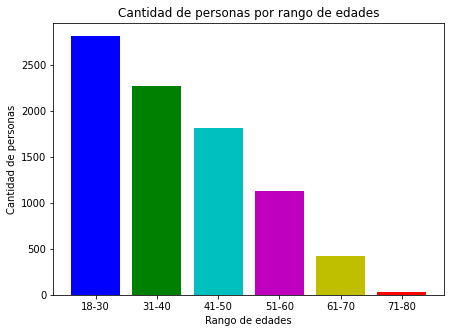

In [89]:
plt.rcParams['figure.figsize']= 7,5
eje_x = ['18-30','31-40','41-50','51-60','61-70','71-80']
eje_y = [len(edad_1),len(edad_2),len(edad_3),len(edad_4),len(edad_5),len(edad_6)]
plt.bar(eje_x, eje_y, color =['b','g','c','m','y','r'])
plt.ylabel('Cantidad de personas')
plt.xlabel('Rango de edades')
plt.title('Cantidad de personas por rango de edades')
plt.show()

Se concluye que la mayor parte de usuarios son personas entre los 18 y 40 años.

# Analizando la variable EDAD y GENERO:

In [90]:
# Observando cantidad de valores por genero Masculino y femenino
df['GENERO'].value_counts()

F    4293
M    4193
Name: GENERO, dtype: int64

In [91]:
# Porcentaje por genero 
df['GENERO'].value_counts(normalize = True)

F    0.505892
M    0.494108
Name: GENERO, dtype: float64

In [92]:
# Cantidad por rango de edades
rangos_edad = [18, 30, 31, 40, 41, 50, 51, 60, 61, 70, 71, 80]
edad_bins = pd.cut(df['EDAD'], bins = rangos_edad)
edad_bins_count = edad_bins.value_counts()
edad_bins_count

(18, 30]    2759
(31, 40]    2020
(41, 50]    1582
(51, 60]    1001
(61, 70]     347
(30, 31]     250
(40, 41]     231
(50, 51]     131
(60, 61]      79
(71, 80]      15
(70, 71]      12
Name: EDAD, dtype: int64

In [93]:
# Agregando la variable "edad_bins" a nuestro data frame principal
df['edad_bins'] = edad_bins

In [94]:
# Agrupando un conteo de edades por GENERO

conteo_edad_x_sexo = (df[['edad_bins', 'GENERO']].dropna()
                        .groupby(['edad_bins', 'GENERO']).size()
                        .reset_index()
                        .rename({0: 'conteo'}, axis=1))
conteo_edad_x_sexo.head(22)

,edad_bins,GENERO,conteo
0,"(18, 30]",F,1418
1,"(18, 30]",M,1341
2,"(30, 31]",F,134
3,"(30, 31]",M,116
4,"(31, 40]",F,1020
5,"(31, 40]",M,1000
6,"(40, 41]",F,115
7,"(40, 41]",M,116
8,"(41, 50]",F,793
9,"(41, 50]",M,789


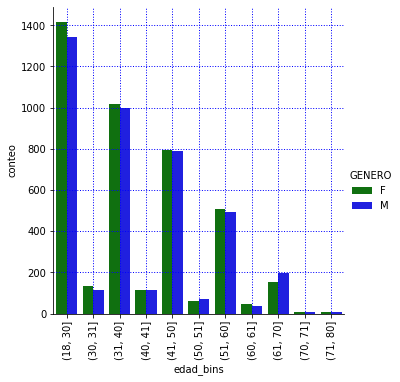

In [95]:
# Gráfico de barras de cantidad de personas por intervalo de edad en cada género

grafico = sns.catplot(data = conteo_edad_x_sexo, kind = 'bar',
                      x = 'edad_bins', y = 'conteo', hue ='GENERO', palette=sns.color_palette(['g','b']))

grafico.set_xticklabels(rotation = 90)
plt.grid(color='b', linestyle='dotted', linewidth=1)
plt.rcParams['font.size'] = 15
plt.show()

In [96]:
# Matriz de correlación con el método Pearson
corr_matrix = df[columnsNumeric].corr(method='pearson')
corr_matrix

,EDAD,NUMERO_DEPENDIENTES,ANTIGUEDAD_DOMICILIO,LIQUIDEZDISPONIBLE,DEUDAS_NEGATIVAS,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL
EDAD,1.000000,0.083239,0.334836,0.051435,0.035760,0.068935,0.021494,0.024493
NUMERO_DEPENDIENTES,0.083239,1.000000,0.012026,0.030761,0.017141,0.052153,0.008084,0.022411
ANTIGUEDAD_DOMICILIO,0.334836,0.012026,1.000000,0.035348,0.015553,0.028737,0.028323,0.001870
LIQUIDEZDISPONIBLE,0.051435,0.030761,0.035348,1.000000,0.048564,0.911896,0.298367,0.047949
DEUDAS_NEGATIVAS,0.035760,0.017141,0.015553,0.048564,1.000000,0.053554,0.026047,-0.005003
UTILIDADOPERATIVA,0.068935,0.052153,0.028737,0.911896,0.053554,1.000000,0.292074,0.120585
VENTASNETAS,0.021494,0.008084,0.028323,0.298367,0.026047,0.292074,1.000000,0.025381
ENDEUDAMIENTOPATRIMONIAL,0.024493,0.022411,0.001870,0.047949,-0.005003,0.120585,0.025381,1.000000


# Matriz de Correlación

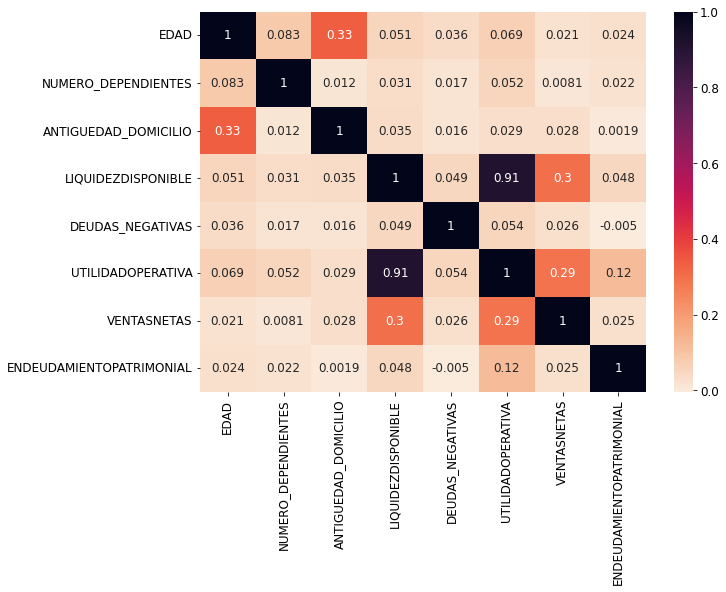

In [97]:
plt.rcParams['figure.figsize']= 10,7
plt.rcParams['font.size'] = 12

df_small = df[columnsNumeric].iloc[:,:9]
correlation = df_small.corr()
sns.heatmap(correlation, annot = True, cmap = sns.color_palette("rocket_r", as_cmap=True)) 
plt.show()

# Se eliminará la variable UTILIDAD OPERATIVA, pues la variable tiene correlación > 0.60 

In [98]:
# Pasando las variables categóricas y numéricas a un dataframe
df_categoric = df[columnsCategoric]
df_numeric   = df[columnsNumeric]

In [99]:
# Describiendo las estadísticas básicas de las variables numéricas
df_numeric.describe()

,EDAD,NUMERO_DEPENDIENTES,ANTIGUEDAD_DOMICILIO,LIQUIDEZDISPONIBLE,DEUDAS_NEGATIVAS,UTILIDADOPERATIVA,VENTASNETAS,ENDEUDAMIENTOPATRIMONIAL
count,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000
mean,38.117723,1.301084,11.737450,878.784709,0.011195,1392.998193,6780.685292,0.238119
std,12.554529,1.136823,8.998206,1149.363821,0.105218,1443.808608,10845.418902,0.183900
min,18.000000,0.000000,0.000000,-130.000000,0.000000,-290.000000,360.000000,0.010000
25%,28.000000,0.000000,5.000000,380.022500,0.000000,736.000000,2400.000000,0.220000
50%,37.000000,1.000000,10.000000,605.000000,0.000000,1097.600000,4036.000000,0.220000
75%,47.000000,2.000000,16.000000,996.187500,0.000000,1660.150000,7200.000000,0.220000
max,80.000000,11.000000,66.000000,55725.000000,1.000000,69165.000000,364000.000000,7.200000


In [100]:
# Almacenando los datos de departamento en un arreglo
departamento = ['DPTO_DOMICILIO']
df[departamento].head()

,DPTO_DOMICILIO
0,LAMBAYEQUE
1,LIMA
2,CAJAMARCA
3,LA LIBERTAD
4,LIMA


In [101]:
gdf_deps = gpd.read_file('../Data/LIMITE_DEPARTAMENTAL.zip')

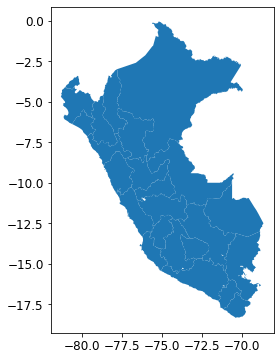

In [102]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
gdf_deps.plot(ax=ax1)
plt.show()

In [103]:
# Contamos la cantidad de personas por departamento en el Perú
conteo_x_dept = df['DPTO_DOMICILIO'].value_counts()
conteo_x_dept = conteo_x_dept.reset_index()
conteo_x_dept.head()

,index,DPTO_DOMICILIO
0,CAJAMARCA,1407
1,PIURA,1188
2,LIMA,975
3,LAMBAYEQUE,791
4,SAN MARTIN,695


In [104]:
# Unimos los conteos utilizando los nombres de departamentos
gdf_conteo_x_dept = pd.merge(left=gdf_deps, right=conteo_x_dept, left_on='NOMBDEP', right_on ='index')

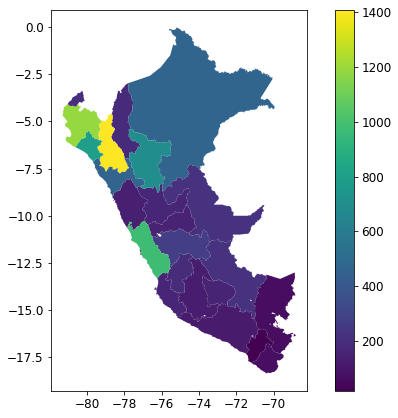

In [105]:
# Mapa de calor del número de personas por departamento
gdf_conteo_x_dept.plot('DPTO_DOMICILIO', cmap ='viridis', legend = True)
plt.show()

# Análisis exploratorio de datos (EDA):

In [106]:
profile = ppr.ProfileReport(df, title = 'Pandas Profiling Report', minimal=True)

In [107]:
profile.to_file('../Data/Reports/AdquisicionHIP_Train.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 117.72it/s]


# Función de diagnóstico mediante gráficas

In [108]:
def diagnostic_plot(df, variable):
    # Define el tamaño de la grafica
    plt.figure(figsize = (22,4))
    
    # Histograma
    plt.subplot(1,3,1)
    sns.distplot(df[variable], bins = 30)
    plt.title('Histograma')
    
    # Grafica Q-Q
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    
    # Grafica de Caja
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Grafico de Cajas')

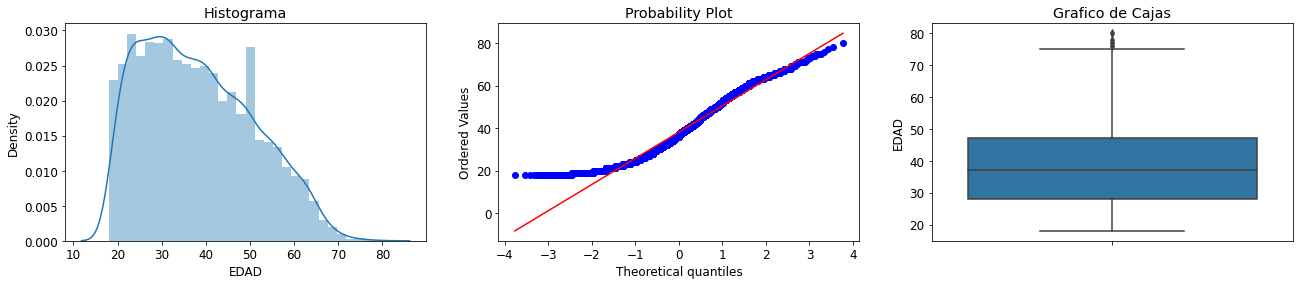

In [109]:
diagnostic_plot(df, 'EDAD')

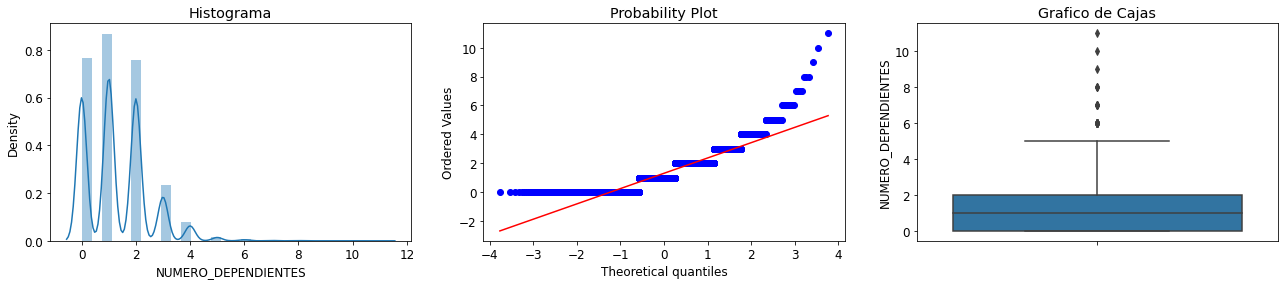

In [110]:
diagnostic_plot(df, 'NUMERO_DEPENDIENTES')

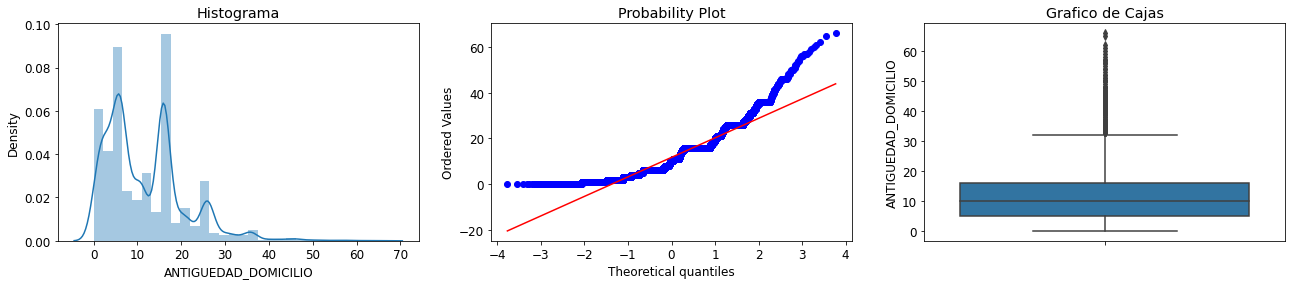

In [111]:
diagnostic_plot(df, 'ANTIGUEDAD_DOMICILIO')

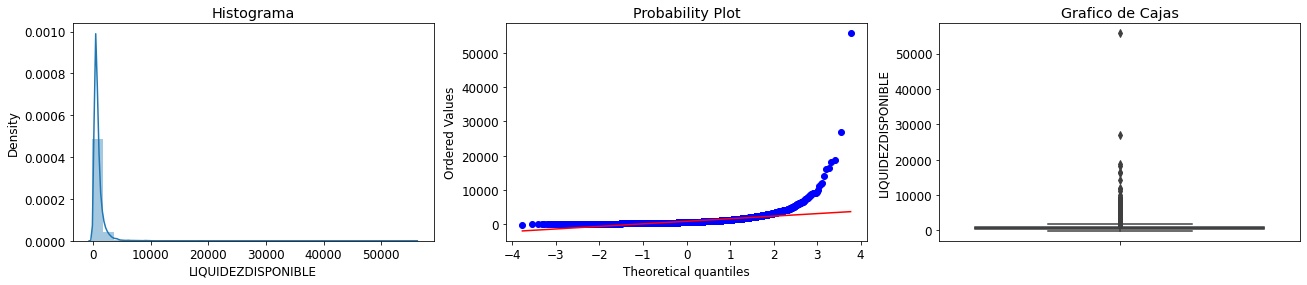

In [112]:
diagnostic_plot(df, 'LIQUIDEZDISPONIBLE')

# Función distancia entre cuartiles

In [113]:
def dist_inter_cuartil(df, variable, distancia):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    limite_inf = df[variable].quantile(0.25) - (IQR * distancia)
    limite_sup = df[variable].quantile(0.75) + (IQR * distancia)
    
    return limite_sup, limite_inf

# Encontramos los límites para las variables

In [114]:
# Encontremos los límites superior e inferior para la variable 'EDAD'

EDAD_limite_sup, EDAD_limite_inf = dist_inter_cuartil( df ,'EDAD' , 1.5)
EDAD_limite_sup, EDAD_limite_inf

(75.5, -0.5)

In [115]:
# Encontremos los límites superior e inferior para la variable 'NUMERO_DEPENDIENTES'

NUMERO_DEPENDIENTES_limite_sup, NUMERO_DEPENDIENTES_limite_inf = dist_inter_cuartil( df ,'NUMERO_DEPENDIENTES' , 1.5)
NUMERO_DEPENDIENTES_limite_sup, NUMERO_DEPENDIENTES_limite_inf

(5.0, -3.0)

In [116]:
# Encontremos los límites superior e inferior para la variable 'ANTIGUEDAD_DOMICILIO'

ANTIGUEDAD_DOMICILIO_limite_sup, ANTIGUEDAD_DOMICILIO_limite_inf = dist_inter_cuartil( df ,'ANTIGUEDAD_DOMICILIO' , 1.5)
ANTIGUEDAD_DOMICILIO_limite_sup, ANTIGUEDAD_DOMICILIO_limite_inf

(32.5, -11.5)

In [117]:
# Encontremos los límites superior e inferior para la variable 'LIQUIDEZDISPONIBLE'

LIQUIDEZDISPONIBLE_limite_sup, LIQUIDEZDISPONIBLE_limite_inf = dist_inter_cuartil( df ,'LIQUIDEZDISPONIBLE' , 1.5)
LIQUIDEZDISPONIBLE_limite_sup, LIQUIDEZDISPONIBLE_limite_inf

(1920.435, -544.2249999999999)

In [118]:
# Encontremos los límites superior e inferior para la variable 'CICLOFINANCIERO'

CICLOFINANCIERO_limite_sup, CICLOFINANCIERO_limite_inf = dist_inter_cuartil( df ,'CICLOFINANCIERO' , 1.5)
CICLOFINANCIERO_limite_sup, CICLOFINANCIERO_limite_inf

(94.93125, -31.018750000000004)

# Reemplazamos los valores extremos

In [119]:
# Reemplazando los valores extremos de la variabe 'EDAD' por 
# los límites máximos y mínimos

df['EDAD'] = np.where(df['EDAD'] > EDAD_limite_sup, EDAD_limite_sup,
             np.where(df['EDAD'] < EDAD_limite_inf, EDAD_limite_inf, df['EDAD']))

In [120]:
# Reemplazando los valores extremos de la variabe 'NUMERO_DEPENDIENTES' por 
# los límites máximos y mínimos

df['NUMERO_DEPENDIENTES'] = np.where(df['NUMERO_DEPENDIENTES']> NUMERO_DEPENDIENTES_limite_sup,
                            NUMERO_DEPENDIENTES_limite_sup,
                            np.where(df['NUMERO_DEPENDIENTES'] < NUMERO_DEPENDIENTES_limite_inf, 
                            NUMERO_DEPENDIENTES_limite_inf, df['NUMERO_DEPENDIENTES']))

In [121]:
# Reemplazando los valores extremos de la variabe 'ANTIGUEDAD_DOMICILIO' por 
# los límites máximos y mínimos

df['ANTIGUEDAD_DOMICILIO'] = np.where(df['ANTIGUEDAD_DOMICILIO'] >ANTIGUEDAD_DOMICILIO_limite_sup,
                             ANTIGUEDAD_DOMICILIO_limite_sup,
                             np.where(df['ANTIGUEDAD_DOMICILIO'] < ANTIGUEDAD_DOMICILIO_limite_inf, 
                             ANTIGUEDAD_DOMICILIO_limite_inf, df['ANTIGUEDAD_DOMICILIO']))

In [122]:
# Reemplazando los valores extremos de la variabe 'LIQUIDEZDISPONIBLE' por 
# los límites máximos y mínimos

df['LIQUIDEZDISPONIBLE'] = np.where(df['LIQUIDEZDISPONIBLE'] > LIQUIDEZDISPONIBLE_limite_sup, 
                           LIQUIDEZDISPONIBLE_limite_sup,
                           np.where(df['LIQUIDEZDISPONIBLE'] < LIQUIDEZDISPONIBLE_limite_inf, 
                           LIQUIDEZDISPONIBLE_limite_inf, df['LIQUIDEZDISPONIBLE']))

# Gráfica al eliminar los outliers

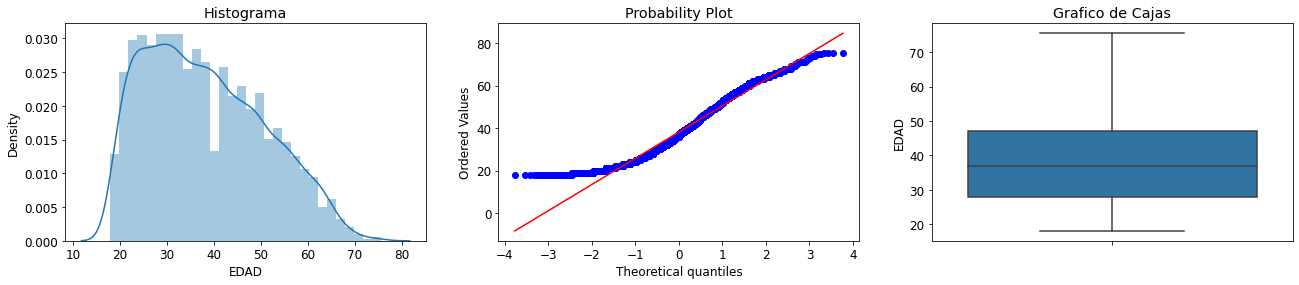

In [123]:
diagnostic_plot(df,'EDAD')

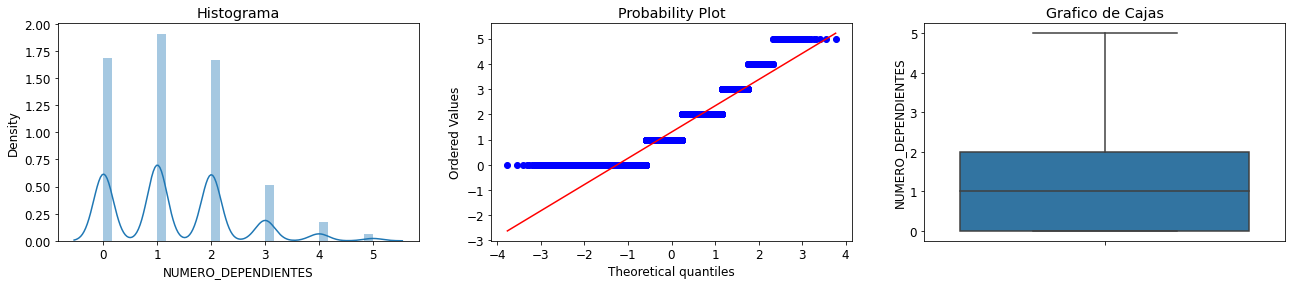

In [124]:
diagnostic_plot(df,'NUMERO_DEPENDIENTES')

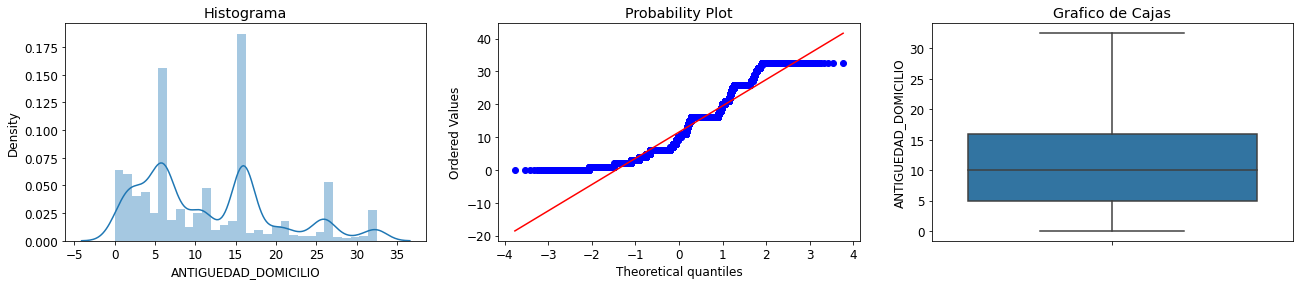

In [125]:
diagnostic_plot(df,'ANTIGUEDAD_DOMICILIO')   

# Tratamiento de variables categoricas

# One hot encoding

In [126]:
# Tratamiento de variables categoricas (O-H-E)
one_hot_encoding = pd.get_dummies(df[columnsCategoric], columns = ['GENERO','ESTADO_CIVIL',
                                                                'CONDICION_VIVIENDA',
                                                                'TIENE_VEHIVULO'])
one_hot_encoding.head()

,GRADO_INSTRUCCION,DPTO_DOMICILIO,TIPO_TRABAJADOR,ACTIVIDAD_ECONOMICA,GENERO_F,GENERO_M,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_S,ESTADO_CIVIL_V,CONDICION_VIVIENDA_ALQUILADO,CONDICION_VIVIENDA_DE FAMILIAR,CONDICION_VIVIENDA_PROPIO,TIENE_VEHIVULO_False,TIENE_VEHIVULO_True
0,MEDIO/SECUNDARIA,LAMBAYEQUE,INDEPENDIENTE,BODEGAS,1,0,0,0,1,0,0,0,1,1,0
1,MEDIO/SECUNDARIA,LIMA,INDEPENDIENTE,VENTA DE COMIDAS,1,0,0,0,1,0,0,0,1,1,0
2,PRIMARIA,CAJAMARCA,INDEPENDIENTE,OTRAS ACTIVIDADES,0,1,1,0,0,0,0,0,1,1,0
3,TECNICO,LA LIBERTAD,INDEPENDIENTE,OTRAS ACTIVIDADES,1,0,0,0,1,0,0,1,0,1,0
4,MEDIO/SECUNDARIA,LIMA,INDEPENDIENTE,BODEGAS,1,0,1,0,0,0,0,1,0,1,0


In [127]:
df1 = copy.copy(one_hot_encoding)

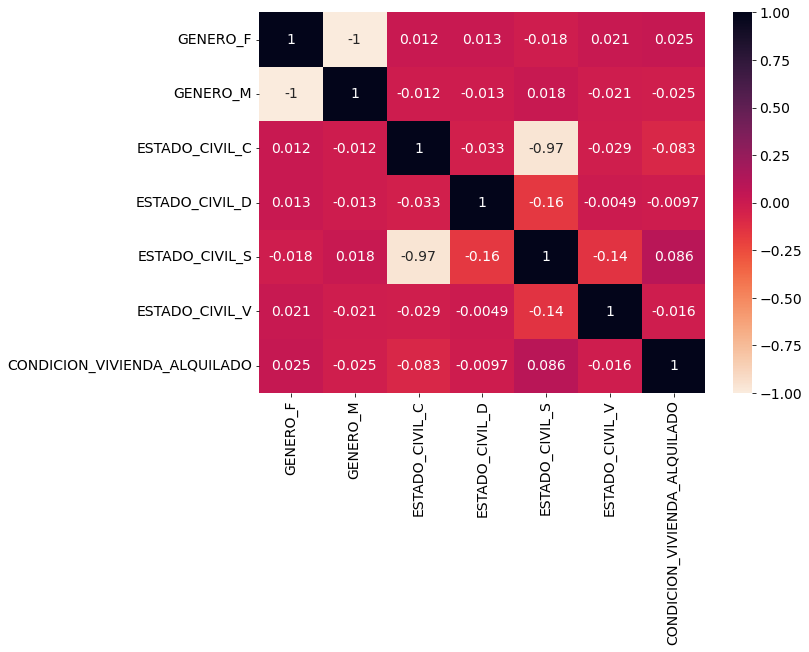

In [128]:
plt.rcParams['figure.figsize']= 10,7  
plt.rcParams['font.size'] = 14

df_small = df1.iloc[:,:11]
correlation = df_small.corr()
sns.heatmap(correlation, annot = True, cmap = sns.color_palette("rocket_r", as_cmap=True)) 
plt.show()